<a href="https://colab.research.google.com/github/rammangla/My-Data-Science-projects/blob/main/Employee_Promotion_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

The client is a large MNC and they have 9 broad verticals across the organisation.

The problem our client is facing is identifying the right people for promotion automatically by feeding various attributes of the employee.

They have provided multiple attributes about employees' past and current performance along with demographics.

*The task is to predict whether the proposed employee will get promotion or not.*

### Data Source

The data is a part of ongoing hackathon on *Analytics Vidhya*. [Employee promotion problem](https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement)

## Importing initial libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows=100

In [2]:
sns.set_style(style='whitegrid')

## Importing the dataset

In [3]:
train_data=r'/content/train_LZdllcl.csv'
prom_df=pd.read_csv(train_data)

In [4]:
prom_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
data_description=pd.read_excel('/content/Book1.xlsx',sheet_name=0, header=0)
pd.options.display.max_colwidth=None
data_description

,Variable,Definition
0,Employee ID,Unique Id of employee
1,Department,Department of employee
2,Region,Region of employement
3,Education,Education level
4,Gender,Gender of employee
5,Recruitment Channel,Channel of recruitment of employee
6,No of trainings,"No of other trainings done in past on soft skills, technical skills etc."
7,Age,Age of employee
8,Previous Year Rating,Rating of employee in previous year
9,Length of service,Length of service in years


## Exhorting the dataset

In [6]:
prom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
prom_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

There are 2409 null values in education.

There are 4124 null values in previous year rating

In [8]:
#Employee_id is only the depiction of id of employee and doesn't display any useful information
del prom_df['employee_id']

In [9]:
prom_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808,NaN,NaN,NaN,1.25301,0.609264,1,1,1,1,10
age,54808,NaN,NaN,NaN,34.8039,7.66017,20,29,33,39,60
previous_year_rating,50684,NaN,NaN,NaN,3.32926,1.25999,1,3,3,4,5
length_of_service,54808,NaN,NaN,NaN,5.86551,4.26509,1,3,5,7,37
KPIs_met >80%,54808,NaN,NaN,NaN,0.351974,0.47759,0,0,0,1,1


## Exploratory data analysis(EDA)

### Univariate Analysis

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


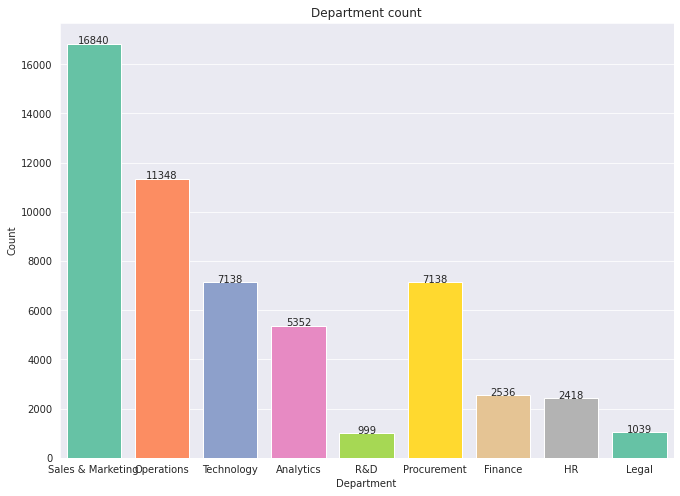

In [10]:
print(prom_df['department'].value_counts())
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(11,8))
ax=plt.axes()
sns.countplot(x="department",data=prom_df,orient='v',palette="Set2",saturation=1,ax=ax)
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department count")
i=0
lis=[0,1,2,4,8,3,5,6,7]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        prom_df['department'].value_counts()[lis[i]],ha="center")
    i += 1






**There are in total 9 departments in company. The various departments along with their value counts is also shown**

In [11]:
prom_df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

**It may be better to convert these region names into numbers corresponding to those regions**

In [12]:
prom_df['region']=prom_df['region'].str[7:]

2     12343
22     6428
7      4843
15     2808
13     2648
26     2260
31     1935
4      1703
27     1659
16     1465
28     1318
11     1315
23     1175
29      994
32      945
19      874
20      850
14      827
25      819
17      796
5       766
6       690
30      657
8       655
10      648
1       610
24      508
12      500
9       420
21      411
3       346
34      292
33      269
18       31
Name: region, dtype: int64


Text(0.5, 1.0, 'Region count')

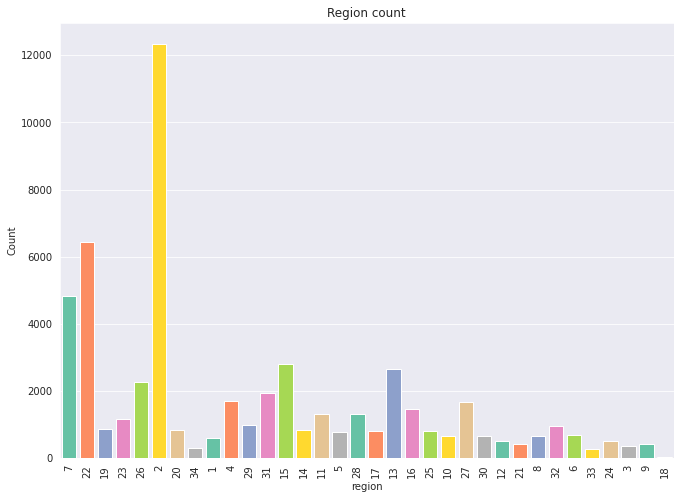

In [13]:

print(prom_df['region'].value_counts())
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(11,8))
ax=plt.axes()
sns.countplot(x="region",data=prom_df,orient='v',palette="Set2",saturation=1,ax=ax)
plt.xlabel("region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Region count")


**In total, there are 34 region of employments. The various regions along with employee count is shown above**

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64


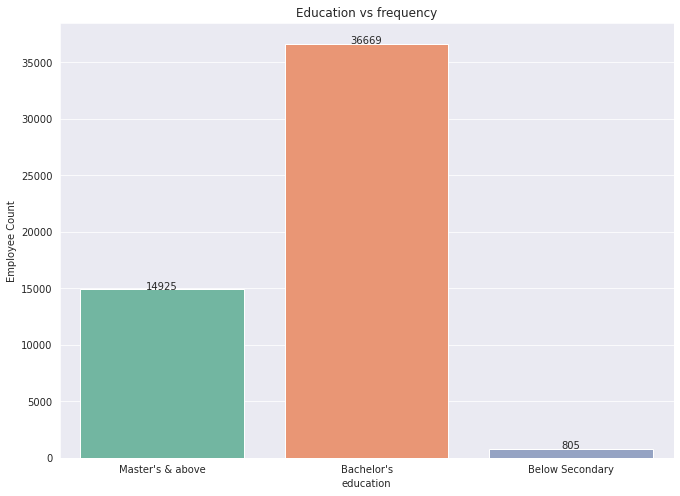

In [14]:
print(prom_df['education'].value_counts(dropna=False))
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(11,8))
ax=plt.axes()
sns.countplot(x='education',data=prom_df,orient='v',palette="Set2",ax=ax)
plt.xlabel("education")
plt.ylabel("Employee Count")
plt.title("Education vs frequency")
lis=[1,0,2]
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        prom_df['education'].value_counts()[lis[i]],ha="center")
    i += 1


**A person may have three kinds of education:**


1.   Masters and above
2.   Bachelor's
3.   Below secondary
*nan* indicates missing values



m    38496
f    16312
Name: gender, dtype: int64


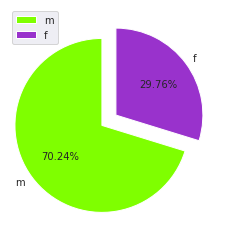

In [15]:
print(prom_df['gender'].value_counts())
fig=plt.figure()
ax=plt.axes()
data=prom_df['gender'].value_counts().values
labels=prom_df['gender'].value_counts().index
explode=[.2,0]
plt.pie(x=data,labels=labels,explode=explode,startangle=90,colors=['chartreuse','darkorchid'],autopct='%.2f%%')
plt.legend()

**The two gender along with their percentages is shown above**

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64


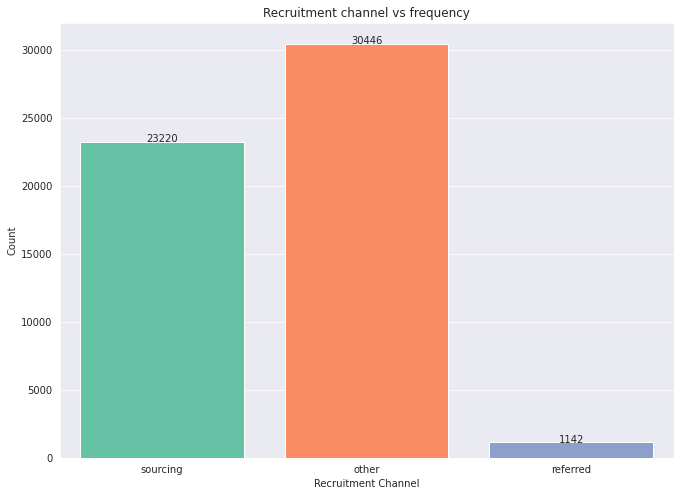

In [16]:
print(prom_df['recruitment_channel'].value_counts())
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(11,8))
ax=plt.axes()
sns.countplot(x="recruitment_channel",data=prom_df,orient='v',palette="Set2",saturation=1,ax=ax)
plt.xlabel("Recruitment Channel")
plt.ylabel("Count")
plt.title("Recruitment channel vs frequency")
i=0
lis=[1,0,2]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        prom_df['recruitment_channel'].value_counts()[lis[i]],ha="center")
    i += 1


Recruitment channel denotes the way employee was admitted to the company.
The channels are:
1. Sourcing
2. Referred
3. Others( denoting some other ways)

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


Text(0.5, 1.0, 'No of trainings vs frequency')

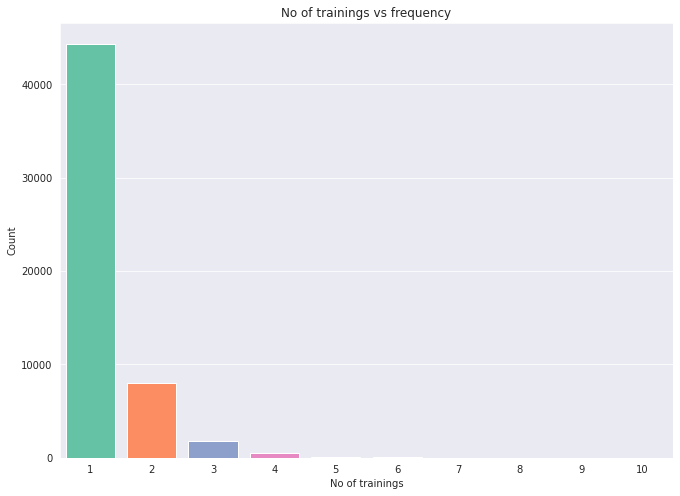

In [17]:
print(prom_df['no_of_trainings'].value_counts())
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(11,8))
ax=plt.axes()
sns.countplot(x="no_of_trainings",data=prom_df,orient='v',palette="Set2",saturation=1,ax=ax)
plt.xlabel("No of trainings")
plt.ylabel("Count")
plt.title("No of trainings vs frequency")

The column denotes the number of past training the employee had.
There is minimum of 1 and maximum of 10 training among all the employees of a company

In [18]:
print(prom_df['age'].min())
print(prom_df['age'].max())

20
60


**All employees of the company lies in the age range of 20-60**

In [19]:
count,bins=np.histogram(a=prom_df['age'],bins=[20,25,30,35,40,45,50,55,60])

In [20]:
bins

array([20, 25, 30, 35, 40, 45, 50, 55, 60])

In [21]:
count

array([ 1715, 12738, 17019, 11011,  5940,  3012,  1938,  1435])

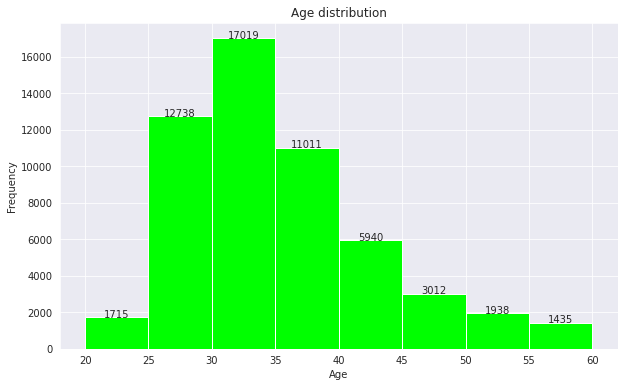

In [22]:
fig=plt.figure(figsize=(10,6))
ax=plt.axes()
plt.hist(x=prom_df['age'],bins=bins,color='lime')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
i=0
lis=count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        lis[i],ha="center")
    i += 1



In [23]:
prom_df['previous_year_rating'].value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

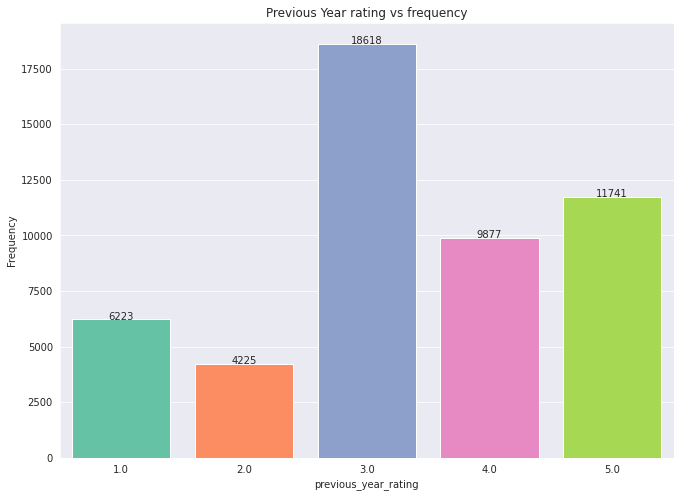

In [24]:
fig=plt.figure(figsize=(11,8))
ax=plt.axes()
sns.countplot(x="previous_year_rating",data=prom_df,orient='v',palette="Set2",saturation=1,ax=ax)
plt.xlabel("previous_year_rating")
plt.ylabel("Frequency")
plt.title("Previous Year rating vs frequency")
i=0
lis=[6223,4225,18618,9877,11741]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        lis[i],ha="center")
    i += 1


**The rating scale used by company in this case lies in range 1-5.**
*nan denotes missing or empty value*

In [25]:
print(prom_df['length_of_service'].min())
print(prom_df['length_of_service'].max())

1
37


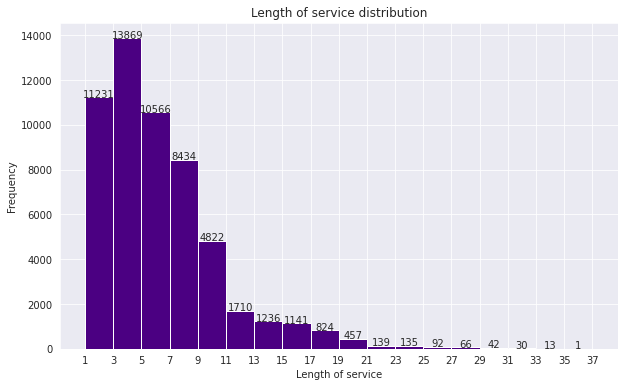

In [26]:
count,bins=np.histogram(a=prom_df['length_of_service'],bins=np.arange(start=1,stop=38,step=2))
fig=plt.figure(figsize=(10,6))
ax=plt.axes()
plt.hist(x=prom_df['length_of_service'],bins=bins,color='indigo')
plt.xlabel("Length of service")
plt.ylabel("Frequency")
plt.title("Length of service distribution")
plt.xticks(ticks=bins)
i=0
lis=count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        lis[i],ha="center")
    i += 1

**Time period for which employees serving the company lies in range of 1-37 years**

In [27]:
prom_df['KPIs_met >80%'].unique()

array([1, 0])

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


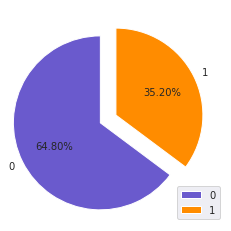

In [28]:
print(prom_df['KPIs_met >80%'].value_counts())
fig=plt.figure()
ax=plt.axes()
data=prom_df['KPIs_met >80%'].value_counts().values
labels=prom_df['KPIs_met >80%'].value_counts().index
explode=[.2,0]
plt.pie(x=data,labels=labels,explode=explode,startangle=90,colors=['slateblue','darkorange'],autopct='%.2f%%')
plt.legend()

*KPI indicates key performance indicator.*
**The column indicates if the percentage of KPI is greater than 80% or not. If yes, then 1 otherwise 0**

In [29]:
prom_df['awards_won?'].unique()

array([0, 1])

0    53538
1     1270
Name: awards_won?, dtype: int64


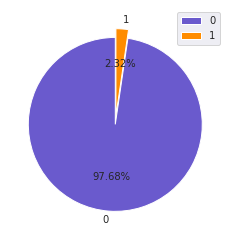

In [30]:
print(prom_df['awards_won?'].value_counts())
fig=plt.figure()
ax=plt.axes()
data=prom_df['awards_won?'].value_counts().values
labels=prom_df['awards_won?'].value_counts().index
explode=[.1,0]
plt.pie(x=data,labels=labels,explode=explode,startangle=90,colors=['slateblue','darkorange'],autopct='%.2f%%')
plt.legend()

**The column indicate whether employee had won an award in the past or not. If yes, then 1 otherwise 0**

In [31]:
print(prom_df['avg_training_score'].min())
print(prom_df['avg_training_score'].max())

39
99


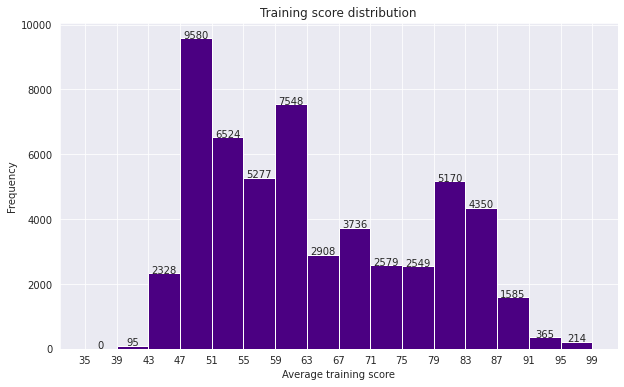

In [32]:
count,bins=np.histogram(a=prom_df['avg_training_score'],bins=np.arange(start=35,stop=100,step=4))
fig=plt.figure(figsize=(10,6))
ax=plt.axes()
plt.hist(x=prom_df['avg_training_score'],bins=bins,color='indigo')
plt.xlabel("Average training score")
plt.ylabel("Frequency")
plt.title("Training score distribution")
plt.xticks(ticks=bins)
i=0
lis=count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        lis[i],ha="center")
    i += 1

The column denote the training score an employee get out of 100 in current evaluation.
**Max value is 99.**
**Min value is 39.**

In [33]:
prom_df['is_promoted'].unique()


array([0, 1])

0    50140
1     4668
Name: is_promoted, dtype: int64


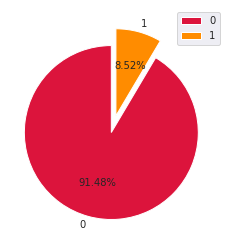

In [34]:
print(prom_df['is_promoted'].value_counts())
fig=plt.figure()
ax=plt.axes()
data=prom_df['is_promoted'].value_counts().values
labels=prom_df['is_promoted'].value_counts().index
explode=[.2,0]
plt.pie(x=data,labels=labels,explode=explode,startangle=90,colors=['crimson','darkorange'],autopct='%.2f%%')
plt.legend()

This is the *target* column.
**Based on the various factors listed before, the goal is to predict whether an employee is promoted or not.**

### Bivariate Analysis

In [35]:
def my_func(x):
  return np.mean(x)*100
table=pd.pivot_table(data=prom_df,index="department",values="is_promoted",aggfunc=my_func)
table.sort_values(by='is_promoted',axis=0,inplace=True,ascending=False)

In [36]:
table

,is_promoted
department,
Technology,10.759316
Procurement,9.638554
Analytics,9.566517
Operations,9.014804
Finance,8.123028
Sales & Marketing,7.203088
R&D,6.906907
HR,5.624483
Legal,5.101059


Text(0.5, 1.0, '% of employees promoted( based on department')

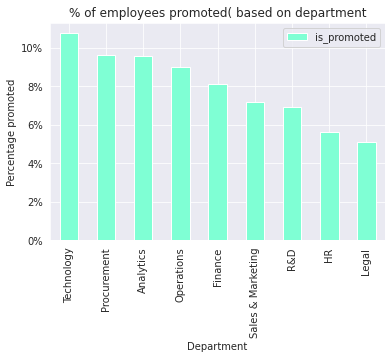

In [37]:
fig=plt.figure()
ax=plt.axes()
table.plot(kind='bar',color=['aquamarine','teal'],ax=ax)
plt.xlabel("Department")
plt.ylabel("Percentage promoted")
plt.yticks(ticks=[0,2,4,6,8,10],labels=['0%','2%','4%','6%','8%','10%'])
plt.title("% of employees promoted( based on department")

In [38]:
def my_func(x):
  return np.mean(x)*100
table=pd.pivot_table(data=prom_df,index="region",values="is_promoted",aggfunc=my_func)
table.sort_values(by='is_promoted',axis=0,inplace=True,ascending=False)

In [39]:
table.head()

,is_promoted
region,
4,14.445097
17,13.693467
25,12.576313
28,11.684370
23,11.659574


In [40]:
table.tail()

,is_promoted
region,
33,3.717472
24,3.543307
18,3.225806
34,2.739726
9,1.904762


Text(0.5, 1.0, '% of employees promoted( based on region')

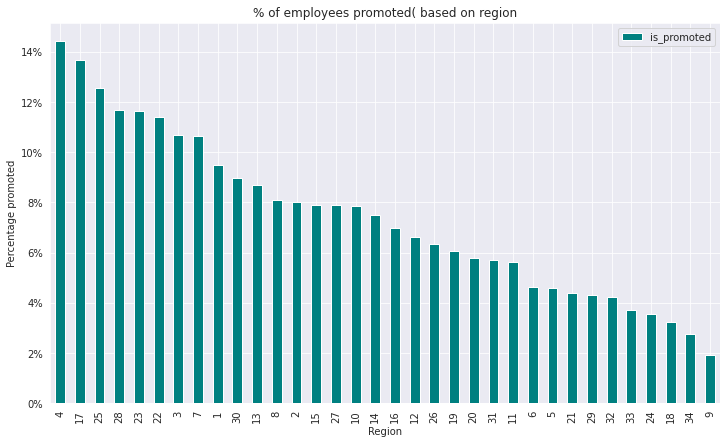

In [41]:
fig=plt.figure(figsize=(12,7))
ax=plt.axes()
table.plot(kind='bar',color=['teal'],ax=ax)
plt.xlabel("Region")
plt.ylabel("Percentage promoted")
plt.yticks(ticks=[0,2,4,6,8,10,12,14],labels=['0%','2%','4%','6%','8%','10%','12%','14%'])
plt.title("% of employees promoted( based on region")

In [42]:
def my_func(x):
  return np.mean(x)*100
table=pd.pivot_table(data=prom_df,index="education",values="is_promoted",aggfunc=my_func)
table.sort_values(by='is_promoted',axis=0,inplace=True,ascending=False)

In [43]:
table

,is_promoted
education,
Master's & above,9.855946
Below Secondary,8.322981
Bachelor's,8.203114


Text(0.5, 1.0, '% of employees promoted( based on education')

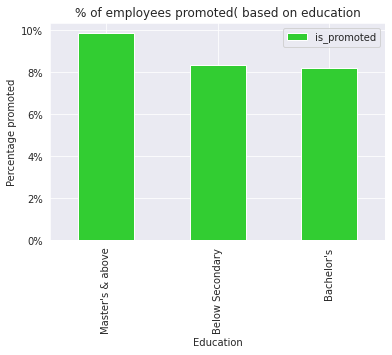

In [44]:
fig=plt.figure()
ax=plt.axes()
table.plot(kind='bar',color=['limegreen'],ax=ax)
plt.xlabel("Education")
plt.ylabel("Percentage promoted")
plt.yticks(ticks=[0,2,4,6,8,10],labels=['0%','2%','4%','6%','8%','10%'])
plt.title("% of employees promoted( based on education")

([<matplotlib.patches.Wedge at 0x7fb4d6edd3d0>,
 [Text(-0.07381477058857593, 1.1977275899147335, 'female'),
  Text(0.06766353970619421, -1.097916957421839, 'male')],
 [Text(-0.043058616176669284, 0.6986744274502612, '51.96%'),
  Text(0.03690738529428775, -0.5988637949573667, '48.04%')])

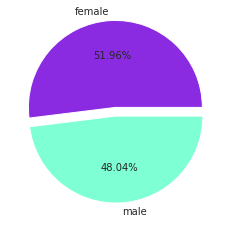

In [45]:
female_prop=len(prom_df[(prom_df['gender']=='f') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['gender']=='f')])
male_prop=len(prom_df[(prom_df['gender']=='m') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['gender']=='m')])
lis1=['female','male']
lis2=[female_prop/(female_prop+male_prop),male_prop/(female_prop+male_prop)]
plt.pie(lis2,labels=lis1,radius=1,colors=['blueviolet','aquamarine'],explode=[.1,0],autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x7fb4d6653d50>,
 [Text(0.4372142488585272, 1.009377877999649, 'other'),
  Text(-1.1, 1.3471114790620887e-16, 'sourcing'),
  Text(0.4769609987547564, -1.1011395032723443, 'referred')],
 [Text(0.23848049937737845, 0.5505697516361721, '36.99%'),
  Text(-0.6, 7.347880794884119e-17, '26.02%'),
  Text(0.27822724927360787, -0.6423313769088675, '36.99%')])

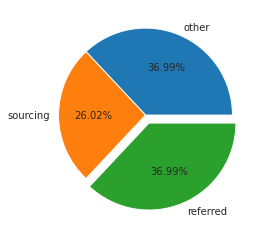

In [46]:
other=len(prom_df[(prom_df['recruitment_channel']=='other') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['recruitment_channel']=='other')])
sourcing=len(prom_df[(prom_df['recruitment_channel']=='sourcing') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['recruitment_channel']=='sourcing')])
referred=other=len(prom_df[(prom_df['recruitment_channel']=='referred') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['recruitment_channel']=='referred')])
list1=['other','sourcing','referred']
s=other+sourcing+referred
list2=[other/s,sourcing/s,referred/s]
plt.pie(list2,labels=list1,radius=1,explode=[0,0,.1],autopct="%.2f%%")

In [47]:
def my_func(x):
  return np.mean(x)*100
table=pd.pivot_table(data=prom_df,index="no_of_trainings",values="is_promoted",aggfunc=my_func)
table.sort_values(by='is_promoted',axis=0,inplace=True,ascending=False)

In [48]:
table

,is_promoted
no_of_trainings,
1,8.810672
2,7.574809
3,6.869369
4,5.555556
6,4.545455
5,2.343750
7,0.000000
8,0.000000
9,0.000000


Text(0.5, 1.0, '% of employees promoted( based on No of trainings')

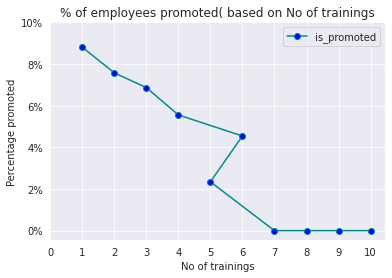

In [49]:
fig=plt.figure()
ax=plt.axes()
table.plot(color=['darkcyan'],ax=ax,marker='o',mfc='blue')
plt.xlabel("No of trainings")
plt.ylabel("Percentage promoted")
plt.yticks(ticks=[0,2,4,6,8,10],labels=['0%','2%','4%','6%','8%','10%'])
plt.xticks(ticks=range(0,11))
plt.title("% of employees promoted( based on No of trainings")

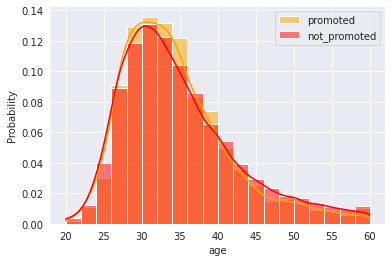

In [50]:
sample1=prom_df[prom_df['is_promoted']==1]
sample2=prom_df[prom_df['is_promoted']==0]
sns.histplot(sample1['age'],bins=20,kde=True,color='orange',label='promoted',stat='probability')
sns.histplot(sample2['age'],bins=20,kde=True,color='red',label='not_promoted',stat='probability')
plt.legend()

In [51]:
def my_func(x):
  return np.mean(x)*100
table=pd.pivot_table(data=prom_df,index="previous_year_rating",values="is_promoted",aggfunc=my_func)
table.sort_values(by='is_promoted',axis=0,inplace=True,ascending=False)

In [52]:
table

,is_promoted
previous_year_rating,
5.0,16.361468
4.0,7.937633
3.0,7.277903
2.0,4.284024
1.0,1.414109


Text(0.5, 1.0, '% of employees promoted( based on previous year rating')

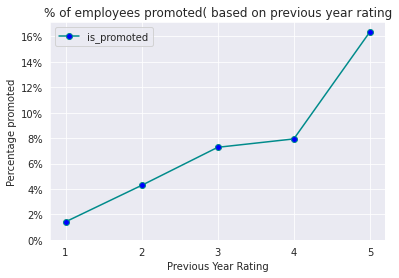

In [53]:
fig=plt.figure()
ax=plt.axes()
table.plot(color=['darkcyan'],ax=ax,marker='o',mfc='blue')
plt.xlabel("Previous Year Rating")
plt.ylabel("Percentage promoted")
plt.yticks(ticks=[0,2,4,6,8,10,12,14,16],labels=['0%','2%','4%','6%','8%','10%','12%','14%','16%'])
plt.xticks(ticks=[1,2,3,4,5])
plt.title("% of employees promoted( based on previous year rating")

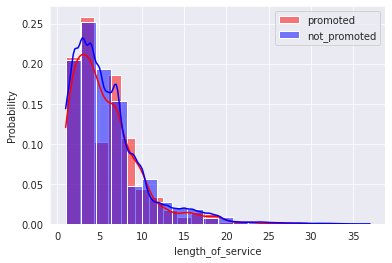

In [54]:
sample1=prom_df[prom_df['is_promoted']==1]
sample2=prom_df[prom_df['is_promoted']==0]
sns.histplot(sample1['length_of_service'],bins=20,color='red',kde=True,label='promoted',stat='probability')
sns.histplot(sample2['length_of_service'],bins=20,color='blue',kde=True,label='not_promoted',stat='probability')
plt.legend()

([<matplotlib.patches.Wedge at 0x7fb4cb6064d0>,
 [Text(-0.7016783876602655, 0.9734718487406251, 'KPI=1'),
  Text(0.6432051051408125, -0.8923492549001184, 'KPI=0')],
 [Text(-0.4093123928018215, 0.5678585784320311, '69.88%'),
  Text(0.35083914825862494, -0.48673595721824636, '30.12%')])

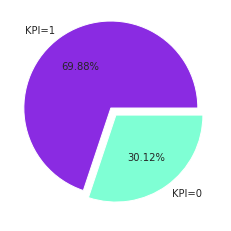

In [55]:
KPI_1=len(prom_df[(prom_df['KPIs_met >80%']==1) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['KPIs_met >80%']==1)])
KPI_0=len(prom_df[(prom_df['KPIs_met >80%']==0) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['KPIs_met >80%']==1)])
lis1=['KPI=1','KPI=0']
lis2=[KPI_1/(KPI_1+KPI_0),KPI_0/(KPI_0+KPI_1)]
plt.pie(lis2,labels=lis1,radius=1,colors=['blueviolet','aquamarine'],explode=[.1,0],autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x7fb4cb5ce890>,
 [Text(-0.9824839335241001, 0.49469720068645223, 'award_y'),
  Text(0.9824839335240999, -0.49469720068645234, 'award_n')],
 [Text(-0.5359003273767818, 0.2698348367380648, '85.15%'),
  Text(0.5359003273767817, -0.26983483673806485, '14.85%')])

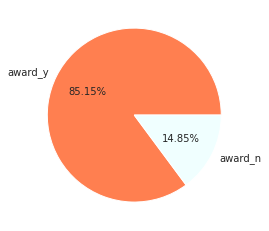

In [56]:
award_y=len(prom_df[(prom_df['awards_won?']==1) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['awards_won?']==1)])
award_n=len(prom_df[(prom_df['awards_won?']==0) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['awards_won?']==0)])
s=award_y+award_n
list1=[award_y/s,award_n/s]
list2=['award_y','award_n']
plt.pie(x=list1,labels=list2,radius=1,autopct="%.2f%%",colors=['coral','azure'])

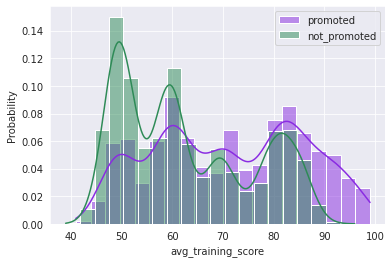

In [57]:
sample1=prom_df[prom_df['is_promoted']==1]
sample2=prom_df[prom_df['is_promoted']==0]
sns.histplot(sample1['avg_training_score'],bins=20,kde=True,color='blueviolet',label='promoted',stat='probability')
sns.histplot(sample2['avg_training_score'],bins=20,kde=True,color='seagreen',label='not_promoted',stat='probability')
plt.legend()

Text(0.5, 0, 'Age')

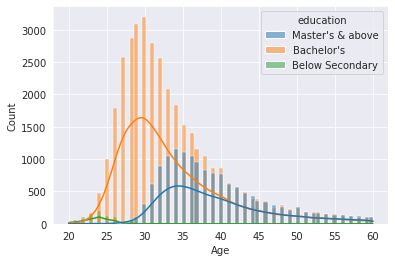

In [58]:
fig=plt.figure()
ax=plt.axes()
sns.histplot(x='age',data=prom_df,hue='education',stat='count',kde=True)
plt.xlabel('Age')

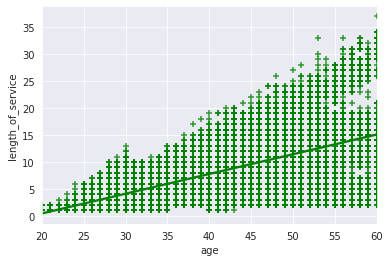

In [59]:
fig=plt.figure()
ax=plt.axes()
sns.regplot(x='age',y='length_of_service',data=prom_df,marker='+',color='g',ci=99)


## Data Preprocessing

In [60]:
prom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


### Dealing with missing values

**Education**

We can impute persons with age from 20-23 years with "Below Secondary"

Persons with age range 23-41 with "Bachelors"

Persons with age>41 years with "Masters"

In [61]:
prom_df['education'].value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [62]:
row_index=prom_df[prom_df['age']<23].index.values

In [63]:
prom_df.loc[row_index,'education']=prom_df.loc[row_index,'education'].replace(np.nan,'Below Secondary')

In [64]:
row_index=prom_df[(prom_df['age']>=23)&(prom_df['age']<42)].index.values
prom_df.loc[row_index,'education']=prom_df.loc[row_index,'education'].replace(np.nan,"Bachelor's")


In [65]:
row_index=prom_df[prom_df['age']>=42].index.values
prom_df.loc[row_index,'education']=prom_df.loc[row_index,'education'].replace(np.nan,"Master's & above")


In [66]:
prom_df['previous_year_rating'].value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

We have seen before previous year rating and is_promoted are strongly correlated. We can assign value of 5 for those getting promoted and 2 for those which are not.

In [67]:
row_index=prom_df[prom_df['is_promoted']==1].index.values

In [68]:
prom_df.loc[row_index,'previous_year_rating']=prom_df.loc[row_index,'previous_year_rating'].replace(np.nan,5)

In [69]:
row_index=prom_df[prom_df['is_promoted']==0].index.values
prom_df.loc[row_index,'previous_year_rating']=prom_df.loc[row_index,'previous_year_rating'].replace(np.nan,2)

In [70]:
prom_df.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [71]:
prom_copy=prom_df.copy()


In [72]:
prom_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


### Encoding Categorical Variables

There are 9 departments. It may be better to label encode them

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
prom_copy['department']=le.fit_transform(prom_copy['department'])

There are 34 regions. It will be better to label encode them

In [74]:
prom_copy['region']=prom_copy['region'].astype('int')

Education are of 3 types. Better is to one hot encode them

In [75]:

sample=pd.get_dummies(prom_copy['education'])
prom_copy=pd.concat([sample,prom_copy],axis=1)
del prom_copy['education']

In [76]:
del prom_copy['Below Secondary']

Gender have only 2 values. It will also be one hot encoded

In [77]:
sample=pd.get_dummies(prom_copy['gender'])
prom_copy=pd.concat([sample,prom_copy],axis=1)
del prom_copy['gender']

In [78]:
del prom_copy['m']

There are 3 columns in recruitment channel which are better be one hot encoded.

In [79]:
sample=pd.get_dummies(prom_copy['recruitment_channel'])
prom_copy=pd.concat([sample,prom_copy],axis=1)
del prom_copy['recruitment_channel']

In [80]:
del prom_copy['referred']

Previous year rating are whole numbers which should be in int.

In [81]:
prom_copy['previous_year_rating']=prom_copy['previous_year_rating'].astype('int')

Age and Length of service doesn't have much impact on chances of promotion. Further, they will create problem of multi-collinearity

Thus, we should remove these columns

In [82]:
prom_df[["age","length_of_service","is_promoted"]].corr()

,age,length_of_service,is_promoted
age,1.000000,0.657111,-0.017166
length_of_service,0.657111,1.000000,-0.010670
is_promoted,-0.017166,-0.010670,1.000000


In [83]:
del prom_copy['age']
del prom_copy['length_of_service']

### Splitting the dataset into training and test set

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X=prom_copy.drop(labels='is_promoted',axis=1)
y=prom_copy['is_promoted']


In [86]:
X.columns

Index(['other', 'sourcing', 'f', 'Bachelor's', 'Master's & above',
       'department', 'region', 'no_of_trainings', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)


In [88]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(46586, 12) (46586,)
(8222, 12) (8222,)


### Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [91]:
X_train[0:5]

array([[-1.11623221,  1.16423599, -0.65038042, -1.55520228,  1.62178057,
        -1.18906926,  1.27118248, -0.41500594, -0.19486495, -0.7380937 ,
        -0.15529237, -0.92673533],
       [ 0.89587094, -0.85893239, -0.65038042, -1.55520228,  1.62178057,
         0.80770026, -0.71158137, -0.41500594,  1.3848755 , -0.7380937 ,
        -0.15529237, -0.92673533],
       [-1.11623221,  1.16423599, -0.65038042,  0.64300317, -0.61660623,
        -1.98777707,  1.76687344, -0.41500594,  1.3848755 ,  1.35484154,
        -0.15529237,  1.46726161],
       [ 0.89587094, -0.85893239, -0.65038042, -1.55520228,  1.62178057,
        -0.39036145, -1.20727233,  1.2237012 , -0.19486495, -0.7380937 ,
        -0.15529237, -0.32823609],
       [ 0.89587094, -0.85893239, -0.65038042,  0.64300317, -0.61660623,
        -1.98777707, -1.20727233,  1.2237012 , -0.19486495, -0.7380937 ,
        -0.15529237,  1.46726161]])

## Data Modeling

First, let's import some required libraries

In [92]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

### 1. Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr_model=LogisticRegression(random_state=0)

In [95]:
params={'solver':['lbfgs','saga','newton-cg'],'C':[1,.1,.5,.05]}

In [96]:
RCV=GridSearchCV(estimator=lr_model,param_grid=params,cv=10,scoring='accuracy')

In [97]:
RCV.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.5, 0.05],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [98]:
print(RCV.best_score_)
print(RCV.best_params_)

0.9177220992974627
{'C': 0.1, 'solver': 'lbfgs'}


In [99]:
lr_model=LogisticRegression(C=.1,random_state=0,solver='lbfgs')
lr_model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred=lr_model.predict(X_test)

In [101]:
print("The accuracy score generated is: ",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

The accuracy score generated is:  0.9244709316468013
[[7544   25]
 [ 596   57]]


### 2. K nearest neighbours

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knc_model=KNeighborsClassifier()

In [104]:
params={'n_neighbors':[5,8,10,12]}
GSV=GridSearchCV(estimator=knc_model,param_grid=params,scoring='accuracy')
GSV.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 8, 10, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [105]:
print(GSV.best_score_)
print(GSV.best_params_)

0.921435642721557
{'n_neighbors': 8}


In [106]:
knc_model=KNeighborsClassifier(n_neighbors=8)
knc_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [107]:
y_pred=knc_model.predict(X_test)
print("The accuracy score generated is: ",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

The accuracy score generated is:  0.9304305521770858
[[7541   28]
 [ 544  109]]


### 3. Support Vector Classifier

In [108]:
from sklearn.svm import SVC

In [109]:
svc_model=SVC(kernel='rbf',C=1,random_state=0,gamma=.5)

In [110]:
svc_model.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [111]:
y_pred=svc_model.predict(X_test)
print("The accuracy score generated is: ",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

The accuracy score generated is:  0.9318900510824617
[[7553   16]
 [ 544  109]]


### 4. Decision Tree Classifier


In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
tree_model=DecisionTreeClassifier(random_state=0)

In [114]:

parameters={'max_depth':[15,13,14,16,19],
            'max_features':[10,12,11]}
RCV=RandomizedSearchCV(estimator=tree_model,param_distributions=parameters,n_iter=10,scoring='accuracy',random_state=0)

In [115]:
RCV.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
          

In [116]:

print(RCV.best_params_)
print(RCV.best_score_)

{'max_features': 12, 'max_depth': 13}
0.9344438016275515


In [117]:

DTC=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=0,max_depth=13)

In [118]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [119]:
y_pred=DTC.predict(X_test)
print("The accuracy score generated is: ",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

The accuracy score generated is:  0.9429579177815617
[[7534   35]
 [ 434  219]]


### 5. Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
RFC=RandomForestClassifier(random_state=0)

In [122]:
parameters={'max_depth':[15,13,10],
            'n_estimators':[50,100,150]}
RCV=GridSearchCV(estimator=RFC,param_grid=parameters,scoring='accuracy')

In [123]:
RCV.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [124]:
print(RCV.best_params_)
print(RCV.best_score_)

{'max_depth': 15, 'n_estimators': 150}
0.9339715696471217


In [125]:
RCV_model=RandomForestClassifier(n_estimators=120,max_depth=15,random_state=0)
RCV_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [126]:
y_pred=RCV_model.predict(X_test)
print("The accuracy score generated is: ",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

The accuracy score generated is:  0.9394307954269034
[[7547   22]
 [ 476  177]]


The best model from all the above models is *Decision Tree Classifier* having accuracy score of .94 or 94%

## Saving the ML model

In [127]:
import tkinter as tk
from joblib import dump,load

In [129]:
dump(DTC,r"my_model.joblib")

['my_model.joblib']